In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("./LoanStats_2016Q3/LoanStats_2016Q3.csv") # 读入数据

D:\software\anaconda\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info() # 输出特征总个数、每个特征的总个数和类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99124 entries, 0 to 99123
Columns: 145 entries, id to settlement_term
dtypes: float64(107), object(38)
memory usage: 109.7+ MB


In [4]:
df.head() # 查看前面5行的数据

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,5000.0,36 months,13.99%,170.87,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,10000.0,10000.0,10000.0,36 months,8.59%,316.10,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,24000.0,24000.0,24000.0,60 months,15.59%,578.42,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,17000.0,17000.0,17000.0,36 months,14.49%,585.08,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,20000.0,20000.0,20000.0,36 months,14.49%,688.33,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail() # 查看最后5行数据

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
99119,NaN,NaN,1600.0,1600.0,1600.0,36 months,14.49%,55.07,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
99120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99122,Total amount funded in policy code 1: 1404586950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99123,Total amount funded in policy code 2: 567415763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.iloc[:5, :10] # 由于特征太多没发一次性查看，因此进行分片查看特征数据
# df.ix
# df.loc

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade
0,NaN,NaN,5000.0,5000.0,5000.0,36 months,13.99%,170.87,C,C3
1,NaN,NaN,10000.0,10000.0,10000.0,36 months,8.59%,316.10,A,A5
2,NaN,NaN,24000.0,24000.0,24000.0,60 months,15.59%,578.42,C,C5
3,NaN,NaN,17000.0,17000.0,17000.0,36 months,14.49%,585.08,C,C4
4,NaN,NaN,20000.0,20000.0,20000.0,36 months,14.49%,688.33,C,C4


In [7]:
# 由于 id 和 menber_id 对于分析没有关系同时也都是空值，因此这边进行丢弃
df.drop('id', axis=1, inplace=True)
df.drop('member_id', axis=1, inplace=True)

In [8]:
# 上表可以看到 int_rate 是百分数的形式，可以去掉 int_rate 的百分号%
df.int_rate = pd.Series(df.int_rate).str.replace('%', '').astype(float)

In [9]:
df.iloc[:5, :8]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade
0,5000.0,5000.0,5000.0,36 months,13.99,170.87,C,C3
1,10000.0,10000.0,10000.0,36 months,8.59,316.10,A,A5
2,24000.0,24000.0,24000.0,60 months,15.59,578.42,C,C5
3,17000.0,17000.0,17000.0,36 months,14.49,585.08,C,C4
4,20000.0,20000.0,20000.0,36 months,14.49,688.33,C,C4


In [10]:
# 由于loan_amnt 和 funded_amnt 二者的数值应该是相等的
print((df.loan_amnt != df.funded_amnt).value_counts())

False    99120
True         4
dtype: int64


In [11]:
# 发现loan_amnt 和 funded_amnt 二者的数值存在4个不等的情况，查看具体的这4个数据
df.query('loan_amnt != funded_amnt').head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
99120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.dropna(axis=0, how='all', inplace=True) # 删除行中都是空值的数据

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99120 entries, 0 to 99119
Columns: 143 entries, loan_amnt to settlement_term
dtypes: float64(107), object(36)
memory usage: 108.9+ MB


In [14]:
df.dropna(axis=1, how='all', inplace=True) # 删除列中都是空值的数据

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99120 entries, 0 to 99119
Columns: 131 entries, loan_amnt to settlement_term
dtypes: float64(95), object(36)
memory usage: 99.8+ MB


In [16]:
df.iloc[:5, 8:18]

,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose
0,Police Officer,9 years,MORTGAGE,105000.0,Not Verified,Sep-16,Fully Paid,n,NaN,major_purchase
1,Supervisory Agent,10+ years,MORTGAGE,137500.0,Source Verified,Sep-16,Current,n,NaN,debt_consolidation
2,Programmer,10+ years,OWN,82000.0,Not Verified,Sep-16,Fully Paid,n,NaN,major_purchase
3,Lead,5 years,RENT,54000.0,Source Verified,Sep-16,Fully Paid,n,NaN,debt_consolidation
4,Assoc DCC dispatcher,10+ years,OWN,65000.0,Verified,Sep-16,Fully Paid,n,NaN,house


In [17]:
# 查看 emp_title 的分布情况
print(df.emp_title.value_counts().head())
print(df.emp_title.value_counts().tail())
df.emp_title.unique().shape

Teacher       1931
Manager       1701
Owner          990
Supervisor     785
Driver         756
Name: emp_title, dtype: int64
Facility Security Officer          1
Owner/Master Barber                1
Asst Prof                          1
Program Counselor                  1
Director of Surface Maintenance    1
Name: emp_title, dtype: int64


(37421,)

In [18]:
# 由于 emp_title 字段的元素太多，很难进行非数值特征的处理（One-hot Encode），同时意义也不是特别大，因此删除该特征
df.drop('emp_title', axis=1, inplace=True)

In [19]:
df.iloc[:5, 8:17]

,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose
0,9 years,MORTGAGE,105000.0,Not Verified,Sep-16,Fully Paid,n,NaN,major_purchase
1,10+ years,MORTGAGE,137500.0,Source Verified,Sep-16,Current,n,NaN,debt_consolidation
2,10+ years,OWN,82000.0,Not Verified,Sep-16,Fully Paid,n,NaN,major_purchase
3,5 years,RENT,54000.0,Source Verified,Sep-16,Fully Paid,n,NaN,debt_consolidation
4,10+ years,OWN,65000.0,Verified,Sep-16,Fully Paid,n,NaN,house


**emp_length 工作年限**

In [20]:
df.emp_length.value_counts()

10+ years    34219
2 years       9066
3 years       7925
< 1 year      7104
1 year        6991
5 years       6170
4 years       6022
n/a           5922
6 years       4406
8 years       4168
9 years       3922
7 years       3205
Name: emp_length, dtype: int64

In [21]:
# 可以看出 emp_length 存在 n/a 字段使用 np.nan 进行替换并用 0 进行填充
# 同时我们只取其中的数值部分而不需要years之类的字符
# 这边把大于10年的当做10来进行处理，小于1年的当做1年来处理
df.replace('n/a', np.nan, inplace=True)
df.emp_length.fillna(value=0, inplace=True)

df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df.emp_length.astype(int).value_counts()

10    34219
1     14095
2      9066
3      7925
5      6170
4      6022
0      5922
6      4406
8      4168
9      3922
7      3205
Name: emp_length, dtype: int64

In [22]:
df.home_ownership.value_counts()

MORTGAGE    46761
RENT        40028
OWN         12325
ANY             6
Name: home_ownership, dtype: int64

In [23]:
df.verification_status.value_counts()

Source Verified    42253
Verified           31356
Not Verified       25511
Name: verification_status, dtype: int64

In [24]:
# 粗略地查看一下目标的情况
df.loan_status.value_counts()

Current               46597
Fully Paid            36547
Charged Off           12939
Late (31-120 days)     1690
In Grace Period         972
Late (16-30 days)       370
Default                   5
Name: loan_status, dtype: int64

In [25]:
df.purpose.value_counts()

debt_consolidation    57682
credit_card           18634
home_improvement       7268
other                  7196
major_purchase         2466
car                    1232
medical                1229
small_business         1060
vacation                901
moving                  888
house                   493
renewable_energy         70
wedding                   1
Name: purpose, dtype: int64

In [26]:
# 查看所有的非数值特征有多少种类
for col in df.select_dtypes(include=['object']).columns:
    print("Column {} has {} unique instances".format(col, len(df[col].unique())))

Column term has 2 unique instances
Column grade has 7 unique instances
Column sub_grade has 35 unique instances
Column emp_length has 11 unique instances
Column home_ownership has 4 unique instances
Column verification_status has 3 unique instances
Column issue_d has 3 unique instances
Column loan_status has 7 unique instances
Column pymnt_plan has 2 unique instances
Column desc has 6 unique instances
Column purpose has 13 unique instances
Column title has 13 unique instances
Column zip_code has 873 unique instances
Column addr_state has 50 unique instances
Column earliest_cr_line has 614 unique instances
Column revol_util has 1087 unique instances
Column initial_list_status has 2 unique instances
Column last_pymnt_d has 28 unique instances
Column next_pymnt_d has 4 unique instances
Column last_credit_pull_d has 29 unique instances
Column application_type has 2 unique instances
Column verification_status_joint has 2 unique instances
Column hardship_flag has 2 unique instances
Column ha

In [27]:
# 查看一下非数值特征的缺失情况
# df.select_dtypes(include=['0']).describe().T.assign(missing_pct=df.apply(lambda x : (len(x)-x.count())/float(len(x))))
df.select_dtypes(include=['object']).describe().T.assign(missing_pct=df.apply(lambda x : (len(x)-x.count())/float(len(x))))

,count,unique,top,freq,missing_pct
term,99120,2,36 months,73898,0.000000
grade,99120,7,C,32846,0.000000
sub_grade,99120,35,B5,8322,0.000000
emp_length,99120,11,10,34219,0.000000
home_ownership,99120,4,MORTGAGE,46761,0.000000
verification_status,99120,3,Source Verified,42253,0.000000
issue_d,99120,3,Aug-16,36280,0.000000
loan_status,99120,7,Current,46597,0.000000
pymnt_plan,99120,2,n,99045,0.000000
desc,6,5,,2,0.999939


In [28]:
df.revol_util = pd.Series(df.revol_util).str.replace('%', '').astype(float)

In [29]:
# 删除缺失值过多和特征类别过多的特征
df.drop(['desc', 'zip_code', 'earliest_cr_line', 'addr_state', 'verification_status_joint', 'hardship_type',
        'hardship_reason', 'hardship_reason', 'hardship_status', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
        'hardship_loan_status', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'title', 'issue_d', 'term', 
         'purpose'], axis=1, inplace=True)

In [30]:
df.select_dtypes(include=['object']).describe().T.assign(missing_pct=df.apply(lambda x : (len(x)-x.count())/float(len(x))))

,count,unique,top,freq,missing_pct
grade,99120,7,C,32846,0.000000
sub_grade,99120,35,B5,8322,0.000000
emp_length,99120,11,10,34219,0.000000
home_ownership,99120,4,MORTGAGE,46761,0.000000
verification_status,99120,3,Source Verified,42253,0.000000
loan_status,99120,7,Current,46597,0.000000
pymnt_plan,99120,2,n,99045,0.000000
initial_list_status,99120,2,w,71869,0.000000
last_pymnt_d,98991,27,Sep-18,42683,0.001301
next_pymnt_d,49634,3,Oct-18,49601,0.499253


In [31]:
# 查看数值型特征的数值缺失情况
float_data = df.select_dtypes(include=['float'])
check_null = float_data.isnull().sum().sort_values(ascending=False)/len(float_data)
check_null[check_null > 0.5]

annual_inc_joint                              0.994784
dti_joint                                     0.994784
orig_projected_additional_accrued_interest    0.992181
hardship_last_payment_amount                  0.989780
hardship_payoff_balance_amount                0.989780
hardship_dpd                                  0.989780
hardship_length                               0.989780
hardship_amount                               0.989780
deferral_term                                 0.989780
settlement_term                               0.983021
settlement_percentage                         0.983021
settlement_amount                             0.983021
mths_since_last_record                        0.800323
mths_since_recent_bc_dlq                      0.737510
mths_since_last_major_derog                   0.703672
mths_since_recent_revol_delinq                0.630690
dtype: float64

In [32]:
df.drop(['annual_inc_joint', 'dti_joint', 'orig_projected_additional_accrued_interest', 'hardship_last_payment_amount', 
         'hardship_payoff_balance_amount', 'hardship_payoff_balance_amount', 'hardship_dpd', 'hardship_length', 'hardship_amount',
        'deferral_term', 'settlement_term', 'settlement_percentage', 'settlement_amount', 'mths_since_last_record',
        'mths_since_recent_bc_dlq', 'mths_since_last_major_derog', 'mths_since_recent_revol_delinq'], axis=1, inplace=True)

In [33]:
# 删除贷后相关的特征，这些特征并不影响贷款的审批
df.drop(['out_prncp', 'out_prncp_inv', 'total_pymnt',
         'total_pymnt_inv', 'total_rec_prncp', 'grade', 'sub_grade'], axis=1, inplace=True)
df.drop(['total_rec_int','total_rec_late_fee',
         'recoveries','collection_recovery_fee','collection_recovery_fee'], axis=1, inplace=True)
df.drop(['last_pymnt_d','last_pymnt_amnt',
         'next_pymnt_d','last_credit_pull_d'], axis=1, inplace=True)
df.drop(['policy_code'], axis=1, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99120 entries, 0 to 99119
Data columns (total 79 columns):
loan_amnt                     99120 non-null float64
funded_amnt                   99120 non-null float64
funded_amnt_inv               99120 non-null float64
int_rate                      99120 non-null float64
installment                   99120 non-null float64
emp_length                    99120 non-null object
home_ownership                99120 non-null object
annual_inc                    99120 non-null float64
verification_status           99120 non-null object
loan_status                   99120 non-null object
pymnt_plan                    99120 non-null object
dti                           99116 non-null float64
delinq_2yrs                   99120 non-null float64
inq_last_6mths                99120 non-null float64
mths_since_last_delinq        53366 non-null float64
open_acc                      99120 non-null float64
pub_rec                       99120 non-null flo

In [35]:
df.select_dtypes(include=['object']).describe().T.assign(missing_pct=df.apply(lambda x : (len(x)-x.count())/len(x)))

,count,unique,top,freq,missing_pct
emp_length,99120,11,10,34219,0.0
home_ownership,99120,4,MORTGAGE,46761,0.0
verification_status,99120,3,Source Verified,42253,0.0
loan_status,99120,7,Current,46597,0.0
pymnt_plan,99120,2,n,99045,0.0
initial_list_status,99120,2,w,71869,0.0
application_type,99120,2,Individual,98603,0.0
hardship_flag,99120,2,N,99026,0.0
disbursement_method,99120,2,Cash,99082,0.0
debt_settlement_flag,99120,2,N,97437,0.0


In [36]:
df.select_dtypes(include=['float']).describe().T.assign(missing_pct=df.apply(lambda x : (len(x)-x.count())/len(x)))

,count,mean,std,min,25%,50%,75%,max,missing_pct
loan_amnt,99120.0,14170.570521,8886.138758,1000.00,7200.00,12000.00,20000.00,40000.00,0.000000
funded_amnt,99120.0,14170.570521,8886.138758,1000.00,7200.00,12000.00,20000.00,40000.00,0.000000
funded_amnt_inv,99120.0,14166.087823,8883.301328,1000.00,7200.00,12000.00,20000.00,40000.00,0.000000
int_rate,99120.0,13.723182,4.874381,5.32,10.49,12.79,15.59,30.99,0.000000
installment,99120.0,432.707316,272.681010,30.12,235.24,361.38,569.83,1535.71,0.000000
annual_inc,99120.0,78488.850081,72694.186060,0.00,48000.00,65448.00,94000.00,8400000.00,0.000000
dti,99116.0,17.943393,8.821034,0.00,11.91,17.60,23.90,999.00,0.000040
delinq_2yrs,99120.0,0.381901,0.988996,0.00,0.00,0.00,0.00,21.00,0.000000
inq_last_6mths,99120.0,0.570521,0.863796,0.00,0.00,0.00,1.00,5.00,0.000000
mths_since_last_delinq,53366.0,33.229172,21.820407,0.00,15.00,30.00,48.00,142.00,0.461602


In [119]:
print(df.columns)
print(df.head(1).values)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc'

In [37]:
df.select_dtypes(include=['object']).describe().T.assign(missing_pct=df.apply(lambda x : (len(x)-x.count())/float(len(x))))

,count,unique,top,freq,missing_pct
emp_length,99120,11,10,34219,0.0
home_ownership,99120,4,MORTGAGE,46761,0.0
verification_status,99120,3,Source Verified,42253,0.0
loan_status,99120,7,Current,46597,0.0
pymnt_plan,99120,2,n,99045,0.0
initial_list_status,99120,2,w,71869,0.0
application_type,99120,2,Individual,98603,0.0
hardship_flag,99120,2,N,99026,0.0
disbursement_method,99120,2,Cash,99082,0.0
debt_settlement_flag,99120,2,N,97437,0.0


In [38]:
df.select_dtypes(exclude=['object']).describe().T.assign(missing_pct=df.apply(lambda x : (len(x)-x.count())/float(len(x))))

,count,mean,std,min,25%,50%,75%,max,missing_pct
loan_amnt,99120.0,14170.570521,8886.138758,1000.00,7200.00,12000.00,20000.00,40000.00,0.000000
funded_amnt,99120.0,14170.570521,8886.138758,1000.00,7200.00,12000.00,20000.00,40000.00,0.000000
funded_amnt_inv,99120.0,14166.087823,8883.301328,1000.00,7200.00,12000.00,20000.00,40000.00,0.000000
int_rate,99120.0,13.723182,4.874381,5.32,10.49,12.79,15.59,30.99,0.000000
installment,99120.0,432.707316,272.681010,30.12,235.24,361.38,569.83,1535.71,0.000000
annual_inc,99120.0,78488.850081,72694.186060,0.00,48000.00,65448.00,94000.00,8400000.00,0.000000
dti,99116.0,17.943393,8.821034,0.00,11.91,17.60,23.90,999.00,0.000040
delinq_2yrs,99120.0,0.381901,0.988996,0.00,0.00,0.00,0.00,21.00,0.000000
inq_last_6mths,99120.0,0.570521,0.863796,0.00,0.00,0.00,1.00,5.00,0.000000
mths_since_last_delinq,53366.0,33.229172,21.820407,0.00,15.00,30.00,48.00,142.00,0.461602


In [ ]:
# 'mths_since_last_delinq', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq'

** Target: Loan Status **

In [39]:
df['loan_status'].value_counts()

Current               46597
Fully Paid            36547
Charged Off           12939
Late (31-120 days)     1690
In Grace Period         972
Late (16-30 days)       370
Default                   5
Name: loan_status, dtype: int64

In [40]:
df.loan_status.replace('Fully Paid', int(1), inplace=True)
df.loan_status.replace('Current', int(1), inplace=True)
df.loan_status.replace('Late (16-30 days)', int(0), inplace=True)
df.loan_status.replace('Late (31-120 days)', int(0), inplace=True)
df.loan_status.replace('Charged Off', np.nan, inplace=True)
df.loan_status.replace('In Grace Period', np.nan, inplace=True)
df.loan_status.replace('Default', np.nan, inplace=True)
df.loan_status.value_counts()

1.0    83144
0.0     2060
Name: loan_status, dtype: int64

In [41]:
df.loan_status.replace('Fully Paid', int(1), inplace=True)
df.loan_status.value_counts()

1.0    83144
0.0     2060
Name: loan_status, dtype: int64

In [42]:
df.dropna(subset=['loan_status'], inplace=True)

In [43]:
corr_matrix = df.corr()
corr_matrix['loan_status'].sort_values(ascending=False)

loan_status                       1.000000
bc_open_to_buy                    0.031124
total_bc_limit                    0.030693
mort_acc                          0.024338
total_rev_hi_lim                  0.023951
tot_hi_cred_lim                   0.023130
avg_cur_bal                       0.023126
max_bal_bc                        0.022845
tot_cur_bal                       0.019663
mo_sin_rcnt_tl                    0.018826
pct_tl_nvr_dlq                    0.016011
mths_since_recent_inq             0.016005
mo_sin_rcnt_rev_tl_op             0.015544
mo_sin_old_rev_tl_op              0.013320
annual_inc                        0.012594
mths_since_recent_bc              0.012528
revol_bal                         0.011746
mths_since_last_delinq            0.009237
mths_since_rcnt_il                0.008902
mths_since_recent_revol_delinq    0.008698
num_bc_tl                         0.006086
num_tl_30dpd                      0.004224
total_bal_ex_mort                 0.003450
total_acc  

In [44]:
cor = df.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # 取阵列的下三角
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)]

funded_amnt                     loan_amnt                   1.000000
funded_amnt_inv                 loan_amnt                   0.999993
                                funded_amnt                 0.999993
installment                     loan_amnt                   0.953700
                                funded_amnt                 0.953700
                                funded_amnt_inv             0.953612
mths_since_last_delinq          delinq_2yrs                -0.551484
total_acc                       open_acc                    0.723913
open_il_24m                     open_il_12m                 0.758375
total_bal_il                    open_act_il                 0.567467
open_rv_12m                     open_acc_6m                 0.623369
open_rv_24m                     open_rv_12m                 0.776473
max_bal_bc                      revol_bal                   0.550961
all_util                        il_util                     0.597763
total_rev_hi_lim                re

In [45]:
df.drop(['funded_amnt', 'funded_amnt_inv', 'installment'], axis=1, inplace=True)

### Model

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.preprocessing import OneHotEncoder

In [47]:
Y = df.loan_status
X = df.drop('loan_status', axis=1, inplace=False)

In [48]:
print(Y.shape)
print(Y.sum())

(85204,)
83144.0


In [49]:
X = pd.get_dummies(X)

In [50]:
X.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',


In [51]:
X.head(1).values

array([[  5.00000000e+03,   1.39900000e+01,   1.05000000e+05,
          7.77000000e+00,   2.00000000e+00,   3.00000000e+00,
          1.20000000e+01,   9.00000000e+00,   0.00000000e+00,
          3.30700000e+03,   2.60000000e+01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   3.56784000e+05,
          2.00000000e+00,   5.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+01,   1.82260000e+04,
          1.17000000e+02,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   7.70000000e+01,   1.22000000e+04,
          0.00000000e+00,   4.00000000e+00,   6.00000000e+00,
          3.00000000e+00,   3.96430000e+04,   2.00000000e+03,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.47000000e+02,   1.99000000e+02,   1.00000000e+00,
          1.00000000e+00,   4.00000000e+00,   1.00000000e+00,
                     nan,   1.00000000e+00,   1.20000000e+01,
          4.00000000e+00,   0.00000000e+00,   2.00000000e+00,
        

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85204 entries, 0 to 99119
Data columns (total 97 columns):
loan_amnt                              85204 non-null float64
int_rate                               85204 non-null float64
annual_inc                             85204 non-null float64
dti                                    85201 non-null float64
delinq_2yrs                            85204 non-null float64
inq_last_6mths                         85204 non-null float64
mths_since_last_delinq                 45786 non-null float64
open_acc                               85204 non-null float64
pub_rec                                85204 non-null float64
revol_bal                              85204 non-null float64
total_acc                              85204 non-null float64
collections_12_mths_ex_med             85204 non-null float64
acc_now_delinq                         85204 non-null float64
tot_coll_amt                           85204 non-null float64
tot_cur_bal            

In [53]:
# X.fillna(0.0, inplace=True)
# X.fillna(0, inplace=True)

### Train data & Test data

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [55]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(59642, 97)
(25562, 97)
(59642,)
(25562,)


In [57]:
# 数据分为训练集和测试集之后，查看正负样本的比例
print(y_train.value_counts())
print(y_test.value_counts())

1.0    58195
0.0     1447
Name: loan_status, dtype: int64
1.0    24949
0.0      613
Name: loan_status, dtype: int64


### GBRT（Gradient Boosting Regression Tree）

In [81]:
# param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
#               'max_depth': [1,2,3,4],
#               'min_samples_split': [50,100,200,400],
#               'n_estimators': [100,200,400,800]
#               }

param_grid = {'learning_rate':[0.1, 0.05],
             'max_depth':[2, 3, 4],
             'min_samples_split':[50, 100],
             'n_estimators':[100, 200]}

# param_grid = {'learning_rate': [0.1],
#               'max_depth': [4],
#               'min_samples_leaf': [3],
#               'max_features': [1.0],
#               }
est = GridSearchCV(ensemble.GradientBoostingRegressor(),
                  param_grid, n_jobs=4, refit=True)

est.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [2, 3, 4], 'min_samples_split': [50], 'n_estimators': [100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [82]:
best_params = est.best_params_
print(best_params)

{'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 50, 'n_estimators': 100}


In [83]:
%%time
est = ensemble.GradientBoostingRegressor(learning_rate=0.1, max_depth=2,
                                         min_samples_split=50, n_estimators=100,
                                         loss='ls', random_state=0).fit(x_train, y_train)

Wall time: 19.3 s


In [84]:
est.score(x_test, y_test)

0.086238068420921854

In [71]:
def compute_ks(data):
    sorted_list = data.sort_values(['predict'], ascending=[True]) # 按照样本为正样本的概率值升序排序 ，也即坏样本的概率从高到低排序
    total_good=sorted_list['label'].sum()
    total_bad = sorted_list.shape[0] - total_good  
    max_ks = 0.0
    good_count = 0.0
    bad_count = 0.0
    for index, row in sorted_list.iterrows(): #按照标签和每行拆开
        if row['label'] == 0:
            bad_count +=1
        else:
            good_count +=1
        val = abs(bad_count/total_bad - good_count/total_good)
        max_ks = max(max_ks, val)
    return max_ks

In [85]:
test_pd = pd.DataFrame()
test_pd['predict'] = est.predict(x_test)
test_pd['label'] = y_test
# df['predict'] = est.predict(x_test)
print("测试集 KS:", compute_ks(test_pd[['label', 'predict']]))

测试集 KS: 3.850678735856868


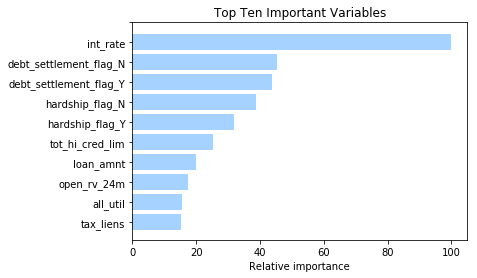

In [80]:
feature_importance = est.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

indices = np.argsort(feature_importance)[-10:]
plt.barh(np.arange(10), feature_importance[indices], color='dodgerblue',alpha=0.4)
plt.yticks(np.arange(10 + 0.25), np.array(X.columns)[indices])
_ = plt.xlabel('Relative importance'), plt.title('Top Ten Important Variables')

### Other model

In [87]:
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor

In [89]:
clf2 = xgb.XGBClassifier(n_estimators=50, max_depth=1, 
                            learning_rate=0.01, subsample=0.8, colsample_bytree=0.3,scale_pos_weight=3.0, 
                             silent=True, nthread=-1, seed=0, missing=None,objective='binary:logistic', 
                             reg_alpha=1, reg_lambda=1, 
                             gamma=0, min_child_weight=1, 
                             max_delta_step=0,base_score=0.5)
clf2.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=1, reg_lambda=1, scale_pos_weight=3.0, seed=0,
       silent=True, subsample=0.8)

In [94]:
print("XGB得分：", clf2.score(x_test, y_test))
test_pd2 = pd.DataFrame()
test_pd2['predict'] = clf2.predict(x_test)
test_pd2['label'] = y_test
print("测试集 KS:", compute_ks(test_pd2[['label','predict']]))
print("特征重要性：", clf2.feature_importances_)

XGB得分： 0.977153587356
测试集 KS: 3.850678735856868
特征重要性： [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.14285

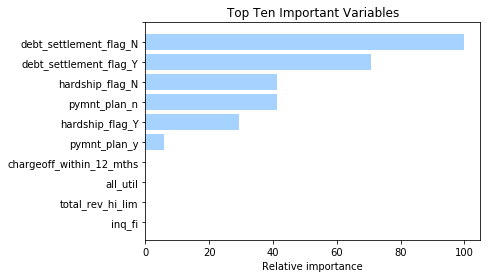

In [92]:
feature_importance = clf2.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

indices = np.argsort(feature_importance)[-10:]
plt.barh(np.arange(10), feature_importance[indices], color='dodgerblue',alpha=0.4)
plt.yticks(np.arange(10 + 0.25), np.array(X.columns)[indices])
_ = plt.xlabel('Relative importance'), plt.title('Top Ten Important Variables')

In [93]:
clf3 = RandomForestRegressor(n_jobs=-1, max_depth=10,random_state=0)
clf3.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [95]:
print("XGB得分：", clf3.score(x_test, y_test))
test_pd3 = pd.DataFrame()
test_pd3['predict'] = clf3.predict(x_test)
test_pd3['label'] = y_test
print("测试集 KS:", compute_ks(test_pd3[['label','predict']]))
print("特征重要性：", clf3.feature_importances_)

XGB得分： 0.0803161520806
测试集 KS: 3.850678735856868
特征重要性： [  8.59355762e-03   3.48944090e-02   1.49628449e-02   1.02702979e-02
   7.47501906e-03   3.14898966e-03   1.60880351e-03   4.03730315e-03
   2.72327889e-03   9.01338198e-03   5.58821328e-03   2.98869565e-03
   0.00000000e+00   4.23051966e-03   8.97920669e-03   1.65403274e-03
   8.77478746e-05   2.31213621e-03   1.97298281e-03   4.93840200e-03
   1.66584310e-03   6.24304007e-03   5.58390631e-03   4.64258760e-03
   4.09023991e-03   1.50485835e-02   2.72062226e-03   1.08826656e-03
   4.01349034e-03   3.41207053e-03   4.74865715e-03   8.37516922e-03
   7.87225130e-03   7.71384439e-03   2.07986239e-03   1.14766634e-03
   1.75148906e-02   1.81182645e-02   7.08538619e-03   2.31069643e-03
   4.47318967e-04   2.71653247e-03   4.94868434e-03   5.58648992e-03
   6.60054905e-03   3.20634595e-03   1.37733107e-03   1.72639059e-03
   1.47725442e-03   2.06336684e-03   7.34697118e-03   5.24697218e-03
   6.19348535e-03   5.50563240e-03   7.22133567

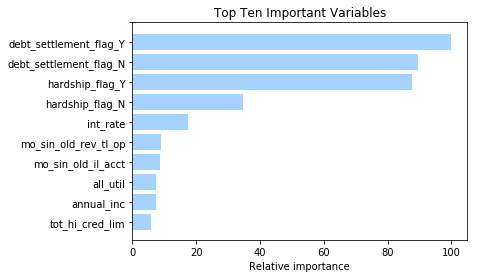

In [96]:
feature_importance = clf3.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

indices = np.argsort(feature_importance)[-10:]
plt.barh(np.arange(10), feature_importance[indices], color='dodgerblue',alpha=0.4)
plt.yticks(np.arange(10 + 0.25), np.array(X.columns)[indices])
_ = plt.xlabel('Relative importance'), plt.title('Top Ten Important Variables')

In [97]:
clf4 = ExtraTreesRegressor(n_jobs=-1, max_depth=10,random_state=0)
clf4.fit(x_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=10,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
          oob_score=False, random_state=0, verbose=0, warm_start=False)

In [98]:
print("XGB得分：", clf4.score(x_test, y_test))
test_pd4 = pd.DataFrame()
test_pd4['predict'] = clf4.predict(x_test)
test_pd4['label'] = y_test
print("测试集 KS:", compute_ks(test_pd3[['label','predict']]))
print("特征重要性：", clf4.feature_importances_)

XGB得分： 0.0844754839937
测试集 KS: 3.850678735856868
特征重要性： [  3.99879300e-03   4.33423876e-02   4.50151808e-03   2.22795396e-03
   5.50403100e-03   3.00773493e-03   3.28092582e-03   1.55688149e-03
   3.72639237e-03   2.71346899e-03   1.22368470e-03   5.50684576e-03
   4.58902478e-04   1.59641661e-03   3.35211756e-03   3.54097662e-03
   4.08029185e-03   1.86963613e-03   2.64582524e-03   4.57054083e-03
   1.23722541e-03   2.67250180e-03   5.00698665e-03   6.42135250e-03
   4.66381492e-03   3.56170802e-03   8.23182970e-04   2.77566041e-03
   5.83426794e-03   4.43048636e-03   1.67548882e-03   1.48385645e-03
   3.04439721e-03   3.64693610e-03   1.48953129e-03   4.08170992e-04
   4.69889778e-03   3.89187952e-03   4.27376261e-03   4.59144311e-03
   1.62345293e-03   6.35550569e-03   2.30338219e-03   4.86576167e-03
   4.02005332e-03   5.89973523e-03   1.63176449e-03   2.52321418e-03
   2.12538200e-03   1.68003059e-03   8.69546879e-03   1.78827465e-03
   1.04202179e-03   2.77875577e-03   3.77172511

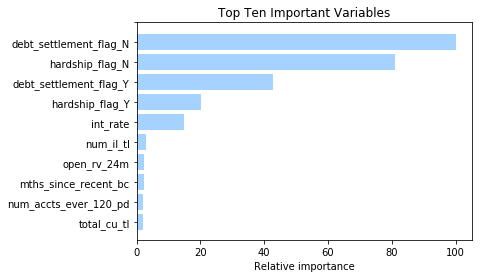

In [99]:
feature_importance = clf4.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

indices = np.argsort(feature_importance)[-10:]
plt.barh(np.arange(10), feature_importance[indices], color='dodgerblue',alpha=0.4)
plt.yticks(np.arange(10 + 0.25), np.array(X.columns)[indices])
_ = plt.xlabel('Relative importance'), plt.title('Top Ten Important Variables')

In [ ]:
# 特征工程方法1：histogram
def get_histogram_features(full_dataset):
    def extract_histogram(x):
        count, _ = np.histogram(x, bins=[0, 10, 100, 1000, 10000, 100000, 1000000, 9000000])
        return count
    column_names = ["hist_{}".format(i) for i in range(8)]
    hist = full_dataset.apply(lambda row: pd.Series(extract_histogram(row)), axis=1)
    hist.columns= column_names
    RETURN hist
# 特征工程方法2：quantile
q = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
column_names = ["quantile_{}".format(i) for i in q]
# print pd.DataFrame(train_x)
quantile = pd.DataFrame(x_train).quantile(q=q, axis=1).T
quantile.columns = column_names
# 特征工程方法3：cumsum
def get_cumsum_features(all_features):
    column_names = ["cumsum_{}".format(i) for i in range(len(all_features))]
    cumsum = full_dataset[all_features].cumsum(axis=1)
    cumsum.columns = column_names
    return cumsum
# 特征工程方法4：特征归一化
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
x_train_normal = Scaler.fit_transform(x_train_normal)